In [28]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
#from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import joblib

#another problem bitch 

In [29]:
# Protrait large de personnes dans des folders. 
#train_dir="Original Images/Original Images"
#Modified Dataset
#train_dir="/face_recognition_dataset/Original_Images_more/"
# test dataset avec les folder de visages de personnes
train_dir = "Datasets/Faces_in_folders"

# Quand on a une classification à faire.
generator = ImageDataGenerator()
#seed : melange tjr de la meme manière le dataset à partir du meme argument
dataset = tf.keras.utils.image_dataset_from_directory(train_dir,image_size=(224, 224),batch_size=32, shuffle=True, seed=123)
dataset_size = len(dataset)
train_test_split=0.8
train_ds=dataset.take(int(train_test_split*dataset_size))
test_ds=dataset.skip(int(train_test_split*dataset_size))

classes = dataset.class_names

Found 2562 files belonging to 30 classes.


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# add padding ou tester sans dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes),activation='softmax'))
#model.add(Dropout(0.3)) -->on ajoute du dropout quand on a de l'overfitting

# 20 couches


In [31]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['binary_accuracy', 'categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [32]:
#history = model.fit(train_ds,epochs= 30, batch_size=32)
history = model.fit(train_ds,epochs= 15, batch_size=32, validation_data=test_ds)

Epoch 1/15
64/64 [==============================] - 113s 2s/step - loss: 2.9045 - binary_accuracy: 0.0182 - categorical_accuracy: 0.0073 - val_loss: 3.6231 - val_binary_accuracy: 0.0195 - val_categorical_accuracy: 0.0000e+00
Epoch 2/15
64/64 [==============================] - 163s 3s/step - loss: 1.7437 - binary_accuracy: 0.0177 - categorical_accuracy: 0.0073 - val_loss: 2.2409 - val_binary_accuracy: 0.0313 - val_categorical_accuracy: 0.0214
Epoch 3/15
64/64 [==============================] - 166s 3s/step - loss: 1.0437 - binary_accuracy: 0.0187 - categorical_accuracy: 0.0156 - val_loss: 1.5645 - val_binary_accuracy: 0.0257 - val_categorical_accuracy: 0.0350
Epoch 4/15
64/64 [==============================] - 134s 2s/step - loss: 0.6663 - binary_accuracy: 0.0197 - categorical_accuracy: 0.0132 - val_loss: 1.3211 - val_binary_accuracy: 0.0219 - val_categorical_accuracy: 0.0175
Epoch 5/15
64/64 [==============================] - 144s 2s/step - loss: 0.3250 - binary_accuracy: 0.0187 - cate

In [33]:
# Saving Model
filename = 'model1_dataset_face_only.hdf5'
joblib.dump(history, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...la

['model1_dataset_face_only.hdf5']

In [34]:
# Load the model from disk
model_saved = joblib.load(filename)
joblib.dump(model_saved, 'model1_dataset_face_only.h5')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-25 19:29:56         8215
metadata.json                                  2023-01-25 19:29:56           64
variables.h5                                   2023-01-25 19:29:56      3036056
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........

['model1_dataset_face_only.h5']

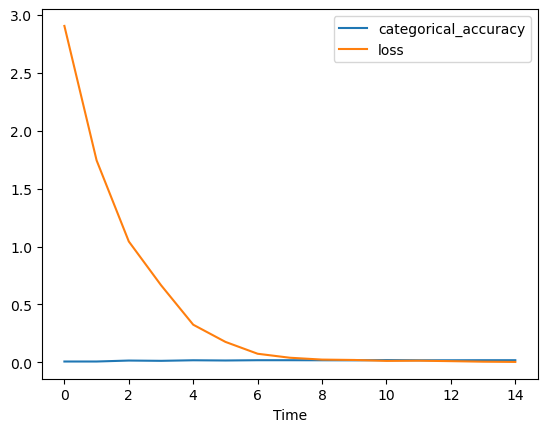

In [35]:
plt.plot(model_saved.history['categorical_accuracy'])
plt.plot(model_saved.history['loss'])
plt.xlabel('Time')
plt.legend(['categorical_accuracy', 'loss'])
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
#from keras_preprocessing import image
from keras.tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    pred = model.predict(images, batch_size=32)
    
    # Prediction accuracy
    #--> le pb que j'arrive pas à resoudre est ici
    print("Score:",(np.argmax(pred)),"%")
    model.evaluate(test_ds)

    print("Actual result: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted result: "+classes[np.argmax(pred)])

predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Brad Pitt/Brad Pitt_103.jpg")

ModuleNotFoundError: No module named 'keras.tensorflow'

In [ ]:
predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Camila Cabello/Camila Cabello_47.jpg")

NameError: name 'image' is not defined